<a href="https://colab.research.google.com/github/iLikeKatz/MyLeaning_ML/blob/main/PytorchFullCourse/PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# y = a + bx
y is the value that we want to know (predicted value)

a is the value that y would be if x = 0

b is slope of graph

x is independent value

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

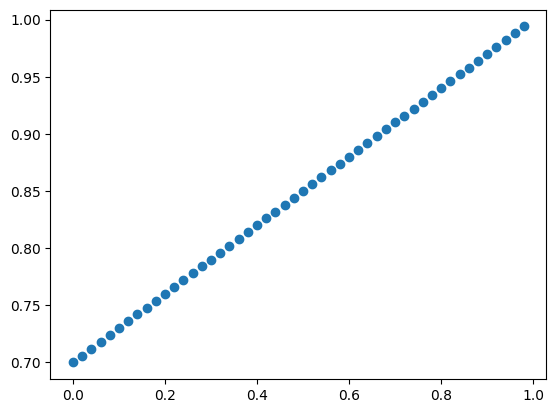

In [17]:
#preparing data to train
a  = 0.7
b = 0.3

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = a + (b * x) #actually answer

plt.scatter(x, y)
plt.show()

In [18]:
#spliting the data
train_split = int(len(x) * 0.8) #in this case i use 80% for training
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test  = x[train_split:], y[train_split:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train, x_test, y_train, y_test = x_train.to("cpu"), x_test.to("cpu"), y_train.to("cpu"), y_test.to("cpu")


In [19]:
#build model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [20]:
def test(x: int) -> torch.tensor: #explain for someone who's wondering tf is this? in (x: int) we just use to tell whoever, that x should be given in int, and -> torch.tensor means that x should return in torch.tensor but these two don't adjust our x, it's just being to tell us what that x should be
  return x
test("f")  #as you've seen, despite we told anyone what x should be, but if the argument isn't follow our define what x should be, it's nothin

'f'

In [21]:
#checking what's in model
torch.manual_seed(42)
model_0 = LinearRegressionModel().to("cpu")

list(model_0.parameters()) #this
model_0.state_dict() # or this


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
#set up a loss function
loss_fn = nn.L1Loss()
learning_rate = 0.01

#set up an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=learning_rate)


In [23]:
#define train loop
loss_list = []
loss_test_list =  []
epoch_count = []
epochs = 200
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred, y_train)

  #reset descent every epoch
  optimizer.zero_grad()

  #calculate backward
  loss.backward()

  #update descent
  optimizer.step()

  #testing model that what will happen if model see unknow data and show it with train, test loss
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0 :
      loss_list.append(loss)
      loss_test_list.append(test_loss)
      epoch_count.append(epoch)
    if epoch == epochs-1 or epoch == 0 or epoch == round((epochs/2)):
      print(f"Epoch : {epoch+1}, Loss : {loss}, Test Loss = {test_loss}, Paramters : {list(model_0.parameters())[0].numpy()[0]}, {list(model_0.parameters())[1].numpy()[0]}")


Epoch : 1, Loss : 0.556881308555603, Test Loss = 0.5250651240348816, Paramters : 0.34059035778045654, 0.1388094127178192
Epoch : 101, Loss : 0.025997888296842575, Test Loss = 0.05985529348254204, Paramters : 0.42757976055145264, 0.6463093161582947
Epoch : 200, Loss : 0.0025325536262243986, Test Loss = 0.008088779635727406, Paramters : 0.30179932713508606, 0.6903098225593567


In [24]:
list(model_0.parameters()) #after being trained our model params is closer to initial weight & bias values

[Parameter containing:
 tensor([0.3018], requires_grad=True),
 Parameter containing:
 tensor([0.6903], requires_grad=True)]

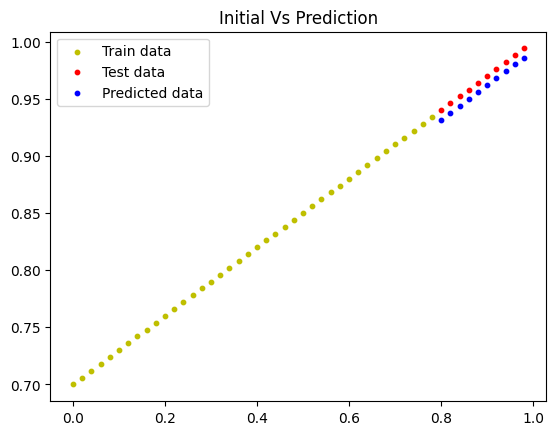

In [25]:
with torch.inference_mode():
  prediction = model_0(x_test)
  plt.scatter(x_train, y_train, c='y', s=10)
  plt.scatter(x_test, y_test, c='r', s=10)
  plt.scatter(x_test, prediction, c='b', s=10)
  plt.legend(["Train data","Test data", "Predicted data"])
  plt.title("Initial Vs Prediction")

  plt.show()

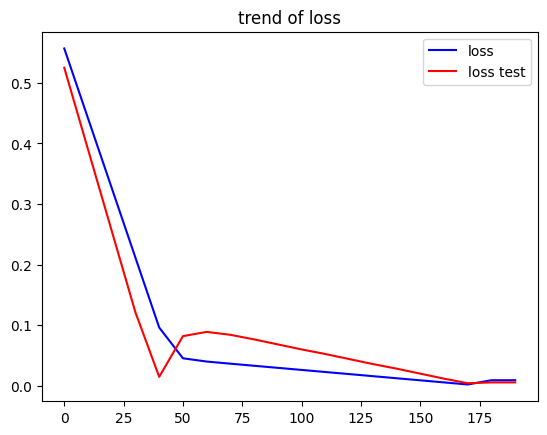

In [26]:
#show tending of loss
with torch.inference_mode():
  plt.plot(epoch_count, loss_list, c='b', label="loss")
  plt.plot(epoch_count, loss_test_list, c='r', label="loss test")
  plt.title("trend of loss")
  plt.legend()
  plt.show()

#** Saving model **

In [27]:
from pathlib import Path

# create model directory
model_path = Path("Models")
model_path.mkdir(parents=True, exist_ok=True)

# create model save path
model_name = "Pytorch_workflow01.pth"
model_save_path = model_path/model_name

#save
torch.save(model_0.state_dict(), model_save_path)


# Loading model

In [28]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

loaded_model_0.state_dict() #completely loaded

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [29]:
#testing model
with torch.inference_mode():
  loaded_model_0.eval(), model_0.eval()
  loaded_model, initial_model = loaded_model_0(x_train), model_0(x_train)

In [30]:
true_count = sum(1 for i in range(len(loaded_model)) if initial_model[i] == loaded_model[i])
f"amount of same predicted data between initial model with loaded model = {true_count} from all {len(loaded_model)}"

'amount of same predicted data between initial model with loaded model = 40 from all 40'